In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configure inline plotting for better visualization in Jupyter Notebook
%matplotlib inline

# Set Seaborn style to 'whitegrid' for clean, grid-based plots
sns.set_style("whitegrid")

# Define default figure size for all plots to ensure consistent appearance
plt.rcParams['figure.figsize'] = (12, 7)


In [2]:
# --- Part 1: Data Loading ---
print("--- Stage 1: Data Preparation and Understanding ---")
print("\n--- 1.1 Loading Data ---")

try:
    # Load user profiles dataset
    profiles_df = pd.read_csv("../data/match_profiles.csv")
    # Load matched pairs dataset
    matches_df = pd.read_csv("../data/matched_pairs.csv")

    print("Data loaded successfully!")
    print(f"Number of user profiles: {len(profiles_df)}")
    print(f"Number of matched pairs: {len(matches_df)}")

except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
    # In production, consider raising an Exception or handling this more gracefully
    exit()
except Exception as e:
    print(f"Unexpected error occurred while loading data: {e}")
    exit()


--- Stage 1: Data Preparation and Understanding ---

--- 1.1 Loading Data ---
Data loaded successfully!
Number of user profiles: 2001
Number of matched pairs: 16586


In [3]:
print("\n--- First 5 Rows of profiles_df ---")
print(profiles_df.head())


--- First 5 Rows of profiles_df ---
   id username    password            email  phone_number first_name  \
0   1    user1  Password@1  user1@gmail.com             0         Ly   
1   2    user2  Password@2  user2@gmail.com             0       Mạnh   
2   3    user3  Password@3  user3@gmail.com             0         An   
3   4    user4  Password@4  user4@gmail.com             0  Lâm Thiện   
4   5    user5  Password@5  user5@gmail.com             0      Giang   

  last_name date_of_birth  height body_type  ... location_preference  \
0      Đinh    1998-07-27    66.0  athletic  ...                  60   
1     Trịnh    1999-07-16    68.0  athletic  ...                   5   
2      Trần    2005-06-04    69.0  athletic  ...                  70   
3        Hà    1998-02-04    68.0  muscular  ...                  30   
4       Ông    2003-02-13    68.0  muscular  ...                  -1   

                                                 bio   latitude   longitude  \
0  bottom line i l

In [4]:
print("\n--- Statistical Summary of Numeric Columns in profiles_df ---")
print(profiles_df.describe())


--- Statistical Summary of Numeric Columns in profiles_df ---
                id  phone_number       height  interested_in_new_language  \
count  2001.000000        2001.0  2001.000000                 2001.000000   
mean   1001.000000           0.0    68.289855                    0.475262   
std     577.783264           0.0     3.895246                    0.499513   
min       1.000000           0.0    55.000000                    0.000000   
25%     501.000000           0.0    65.000000                    0.000000   
50%    1001.000000           0.0    68.000000                    0.000000   
75%    1501.000000           0.0    71.000000                    1.000000   
max    2001.000000           0.0    83.000000                    1.000000   

       dropped_out_school  location_preference     latitude    longitude  
count         2001.000000          2001.000000  2001.000000  2001.000000  
mean             0.051474            31.819090    21.004675   105.755732  
std              0

In [5]:
from datetime import datetime
import numpy as np

def calculate_age(born_str):
    """
    Convert a date of birth string into age in years.

    Parameters:
        born_str (str): Date of birth in 'YYYY-MM-DD' format.

    Returns:
        int or np.nan: Age in years or NaN if invalid input.
    """
    try:
        born = datetime.strptime(str(born_str), '%Y-%m-%d')
        today = datetime.today()
        # Calculate age accounting for whether birthday has occurred this year
        age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
        return age
    except (ValueError, TypeError):
        # Return NaN if the date format is invalid or missing
        return np.nan

# Apply age calculation to 'date_of_birth' column and create new 'age' column
profiles_df['age'] = profiles_df['date_of_birth'].apply(calculate_age)

print("\n--- 'age' column has been created ---")


--- 'age' column has been created ---



--- 1.2.1 Visualizing User Profile Data ---


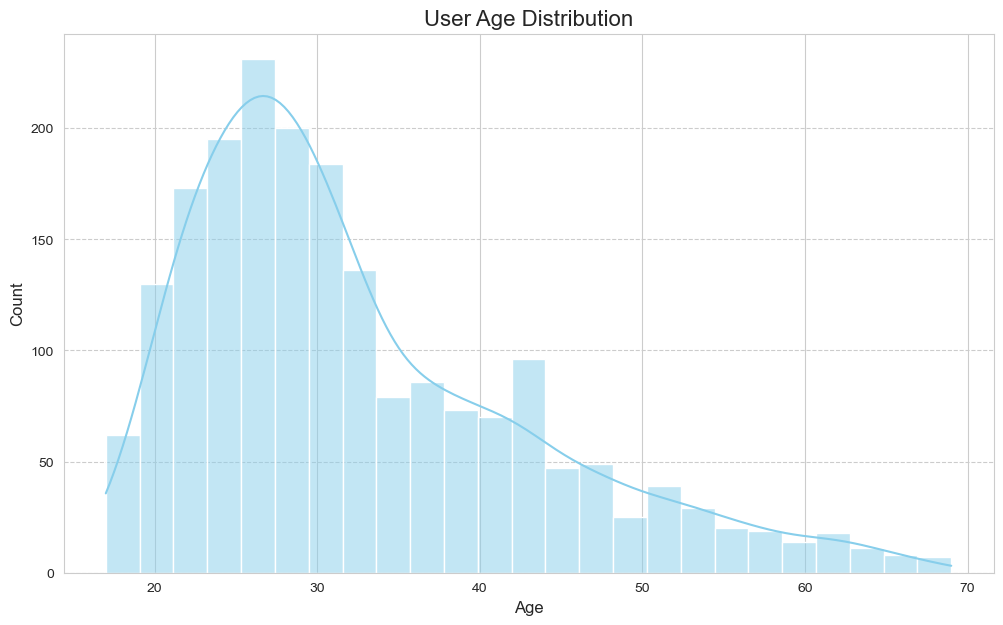

In [6]:
# --- Data Visualization for profiles_df ---
print("\n--- 1.2.1 Visualizing User Profile Data ---")

# Plot age distribution
plt.figure()
sns.histplot(profiles_df['age'], kde=True, bins=25, color='skyblue')
plt.title('User Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

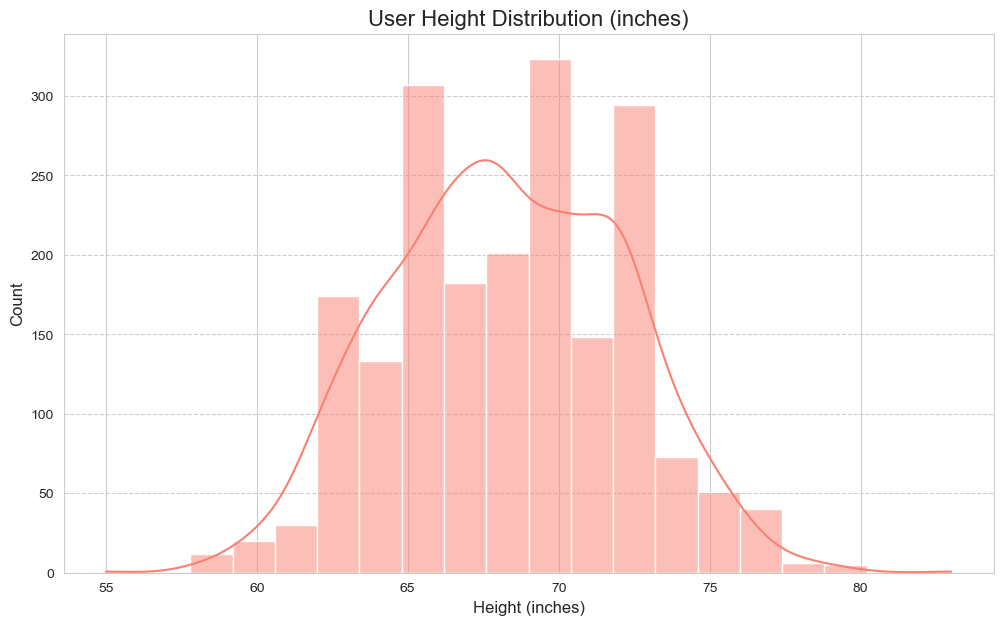

In [7]:
# Plot height distribution (in inches)
plt.figure()
sns.histplot(profiles_df['height'].dropna(), kde=True, bins=20, color='salmon')
plt.title('User Height Distribution (inches)', fontsize=16)
plt.xlabel('Height (inches)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

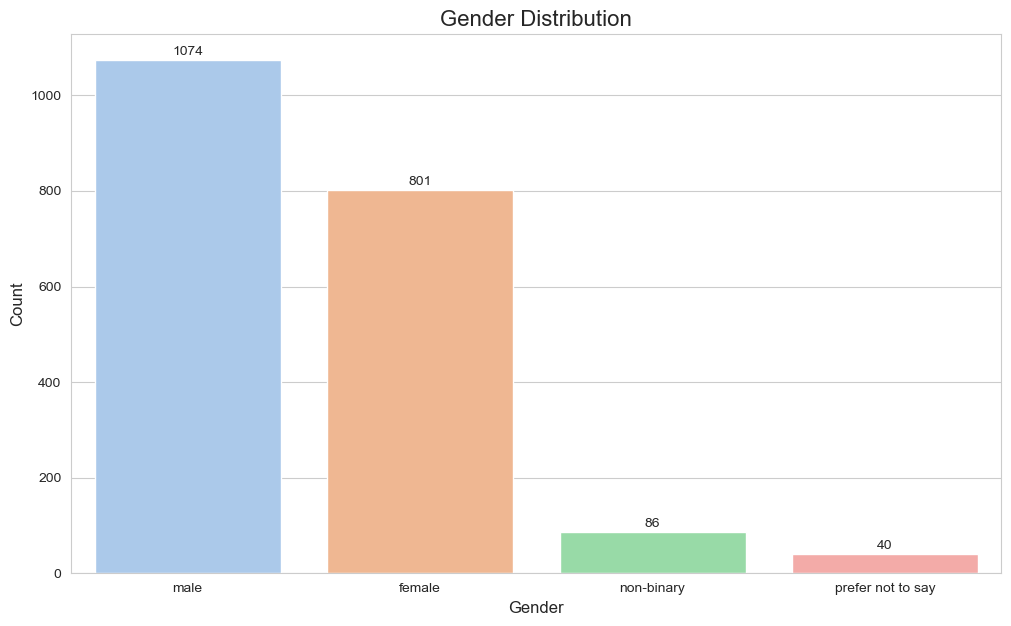

In [8]:
plt.figure()

sex_counts = profiles_df['sex'].value_counts()
sex_df = sex_counts.reset_index()
sex_df.columns = ['sex', 'count']

# Sử dụng DataFrame với cột để vẽ, và set legend=False vì không cần legend
sns.barplot(data=sex_df, x='sex', y='count', palette='pastel', hue='sex', legend=False)

plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, count in enumerate(sex_df['count']):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

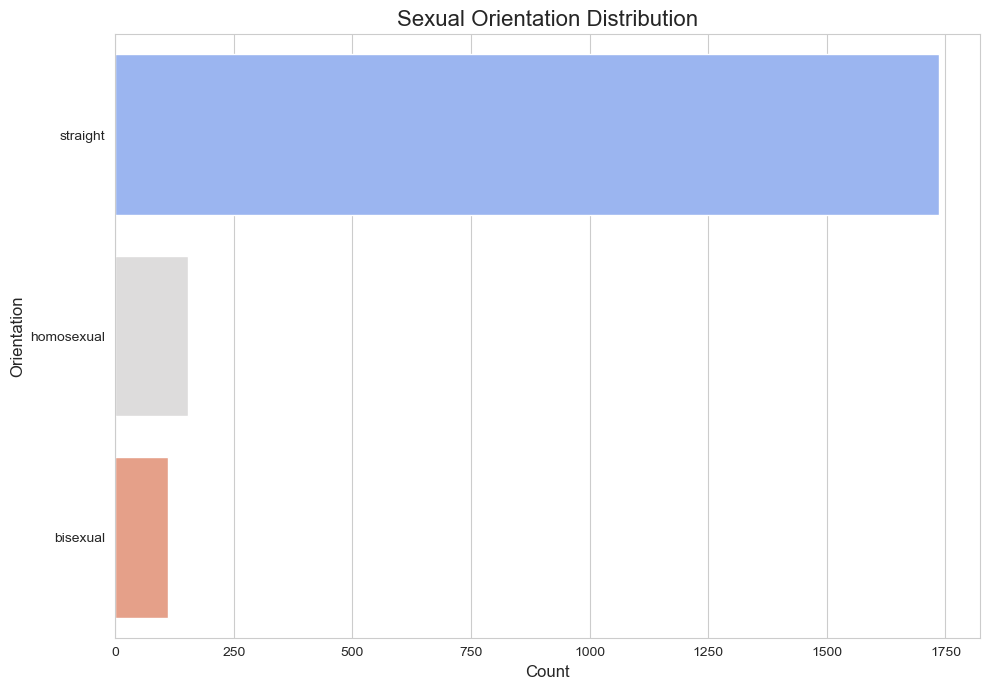

In [9]:
plt.figure(figsize=(10, 7))

# Prepare a DataFrame from the value counts for better seaborn compatibility
orientation_counts = profiles_df['orientation'].value_counts()
orientation_df = orientation_counts.reset_index()
orientation_df.columns = ['orientation', 'count']

# Use 'hue' to apply palette properly and avoid future warnings
# Set legend=False since the legend is redundant here
sns.barplot(
    data=orientation_df,
    y='orientation',
    x='count',
    palette='coolwarm',
    orient='h',
    hue='orientation',
    legend=False
)

plt.title('Sexual Orientation Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Orientation', fontsize=12)

# Adjust layout to prevent label cutoff and improve readability
plt.tight_layout()
plt.show()

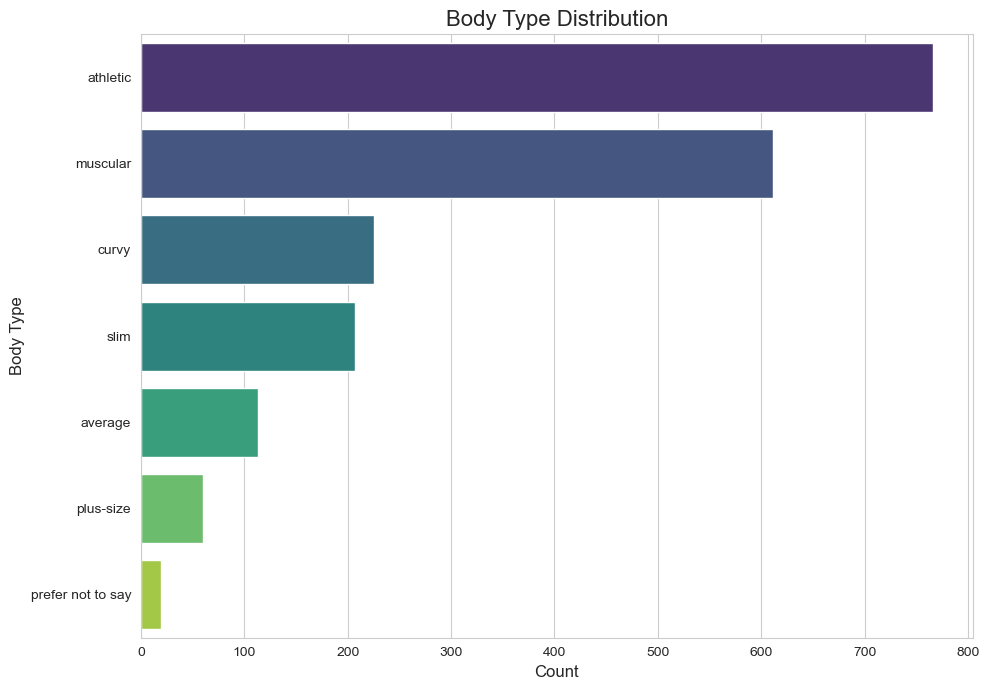

In [10]:
plt.figure(figsize=(10, 7))

# Convert value counts to DataFrame for better seaborn compatibility
body_type_counts = profiles_df['body_type'].value_counts()
body_type_df = body_type_counts.reset_index()
body_type_df.columns = ['body_type', 'count']

# Use 'hue' to apply palette correctly and avoid future warnings
# Disable legend since it duplicates the categorical information
sns.barplot(
    data=body_type_df,
    y='body_type',
    x='count',
    palette='viridis',
    orient='h',
    hue='body_type',
    legend=False
)

plt.title('Body Type Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Body Type', fontsize=12)

# Ensure layout is tight so labels are not cut off
plt.tight_layout()
plt.show()

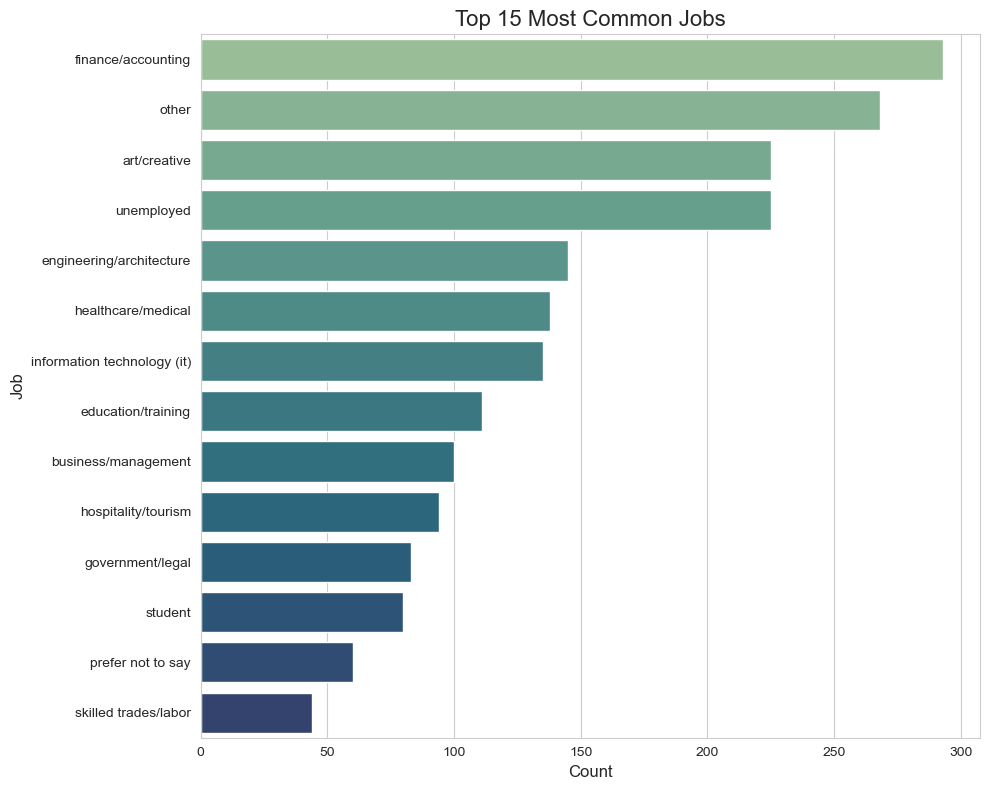

In [11]:
top_n_jobs = 15  # Number of most common jobs to display

plt.figure(figsize=(10, 8))

# Get the top N most frequent jobs
job_counts = profiles_df['job'].value_counts().nlargest(top_n_jobs)

# Convert to DataFrame for seaborn compatibility
job_df = job_counts.reset_index()
job_df.columns = ['job', 'count']

# Use 'hue' to correctly apply the color palette and avoid warnings
sns.barplot(
    data=job_df,
    y='job',
    x='count',
    palette="crest",
    orient='h',
    hue='job',
    legend=False
)

plt.title(f'Top {top_n_jobs} Most Common Jobs', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job', fontsize=12)

plt.tight_layout()  # Prevent label cutoff
plt.show()


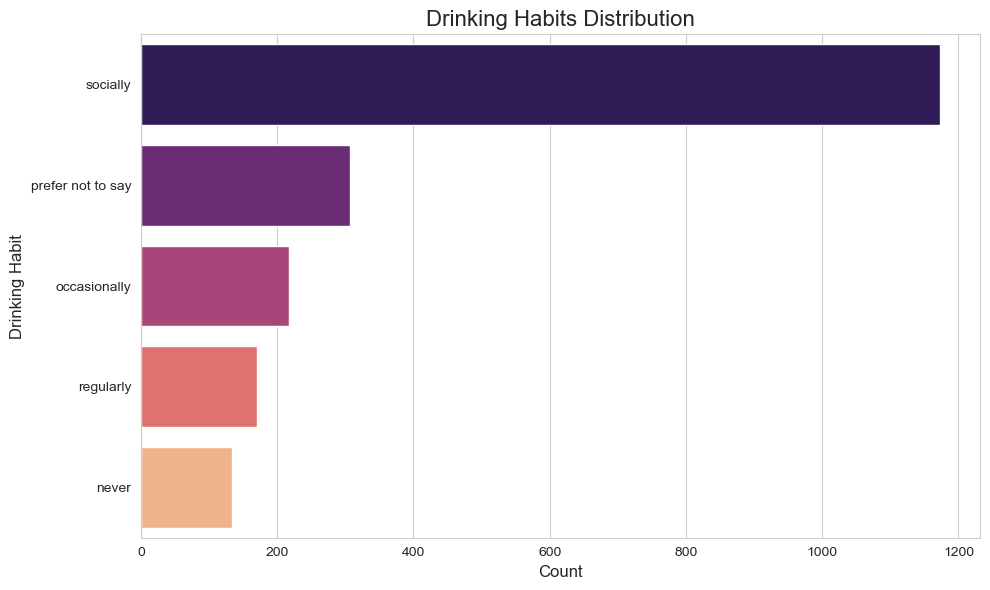

In [12]:
plt.figure(figsize=(10, 6))

# Convert value counts of drinking habits to DataFrame for seaborn plotting
drink_counts = profiles_df['drink'].value_counts()
drink_df = drink_counts.reset_index()
drink_df.columns = ['drink', 'count']

# Use hue to apply palette properly and suppress warnings
sns.barplot(
    data=drink_df,
    y='drink',
    x='count',
    palette='magma',
    orient='h',
    hue='drink',
    legend=False
)

plt.title('Drinking Habits Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Drinking Habit', fontsize=12)

plt.tight_layout()  # Ensure labels and titles are not cut off
plt.show()

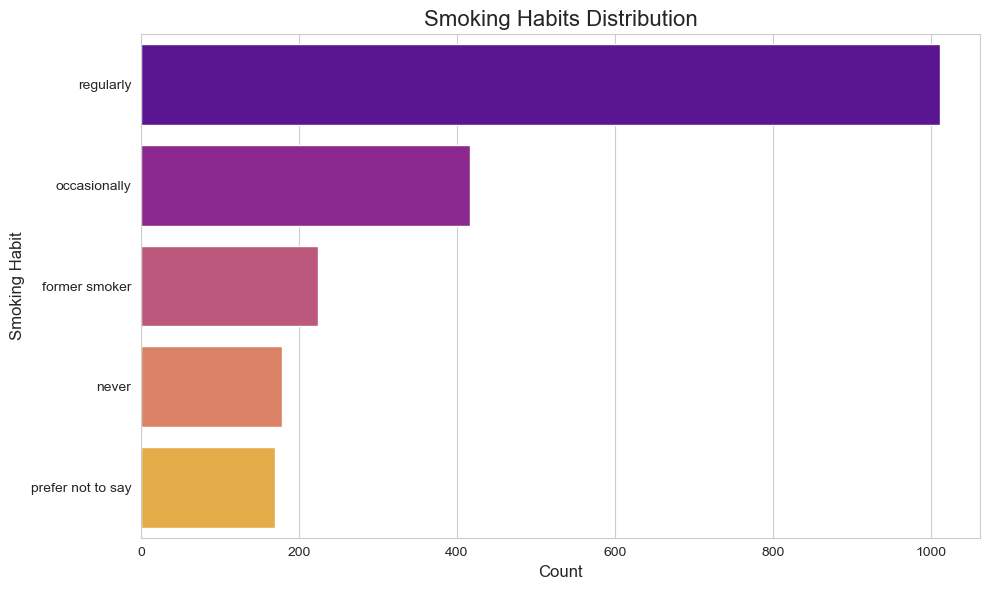

In [13]:
plt.figure(figsize=(10, 6))

# Count the frequency of each unique smoking habit in the 'smoke' column
smoke_counts = profiles_df['smoke'].value_counts()

# Convert the Series to a DataFrame for better integration with seaborn plotting functions
smoke_df = smoke_counts.reset_index()

# Rename the columns for clarity.
smoke_df.columns = ['smoke', 'count']

# Create a horizontal bar plot using seaborn's barplot function
sns.barplot(
    data=smoke_df,
    y='smoke',
    x='count',
    palette='plasma',
    orient='h',
    hue='smoke',
    legend=False
)

# Set the plot title with a larger font for clear section identification
plt.title('Smoking Habits Distribution', fontsize=16)

# Label the x-axis to indicate the meaning of the bar lengths (counts)
plt.xlabel('Count', fontsize=12)

# Label the y-axis to indicate the categories of smoking habits
plt.ylabel('Smoking Habit', fontsize=12)

# Use tight_layout to automatically adjust subplot parameters
# This prevents the labels and titles from being cut off or overlapping with the figure boundaries
plt.tight_layout()

plt.show()


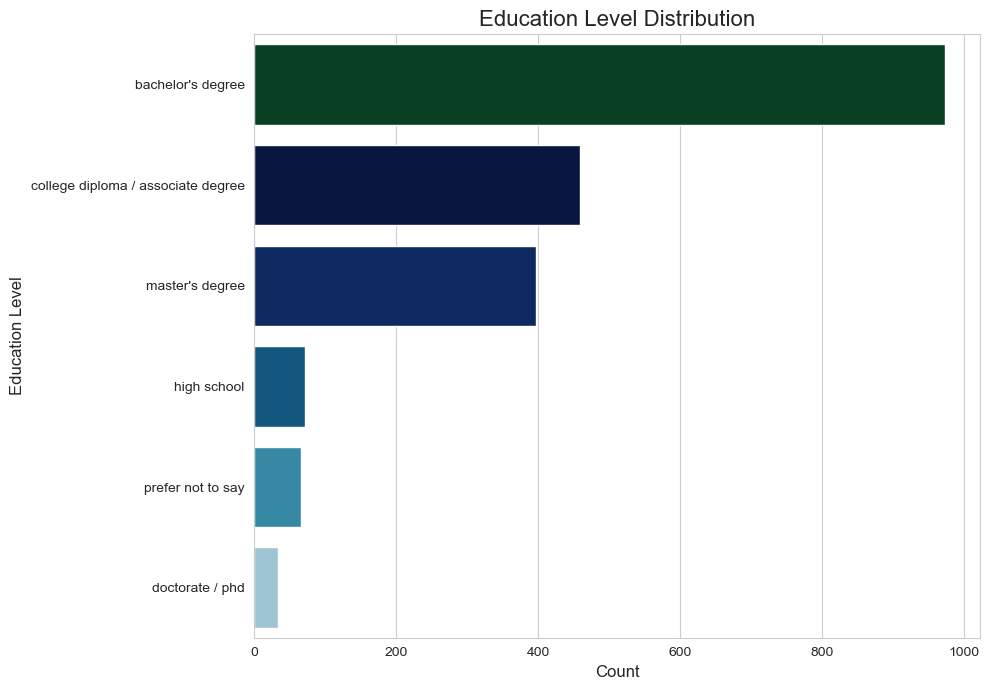

In [14]:
plt.figure(figsize=(10, 7))

# Count the number of occurrences for each education level category in the dataset
education_counts = profiles_df['education_level'].value_counts()

# Convert the Series object to a DataFrame for compatibility with seaborn plotting functions
education_df = education_counts.reset_index()

# Rename the columns for clarity.
education_df.columns = ['education_level', 'count']

# Create a horizontal bar plot to visualize the distribution of education levels.
sns.barplot(
    data=education_df,
    y='education_level',
    x='count',
    palette='ocean',
    orient='h',
    hue='education_level',
    legend=False
)

# Set the plot title with a larger font size for emphasis and clarity
plt.title('Education Level Distribution', fontsize=16)

# Label the x-axis to clarify that the bar lengths represent counts
plt.xlabel('Count', fontsize=12)

# Label the y-axis to indicate the categories of education level
plt.ylabel('Education Level', fontsize=12)

# Adjust layout to prevent axis labels or titles from being clipped or overlapped
plt.tight_layout()

# Render the plot in the output (e.g., notebook or script window)
plt.show()

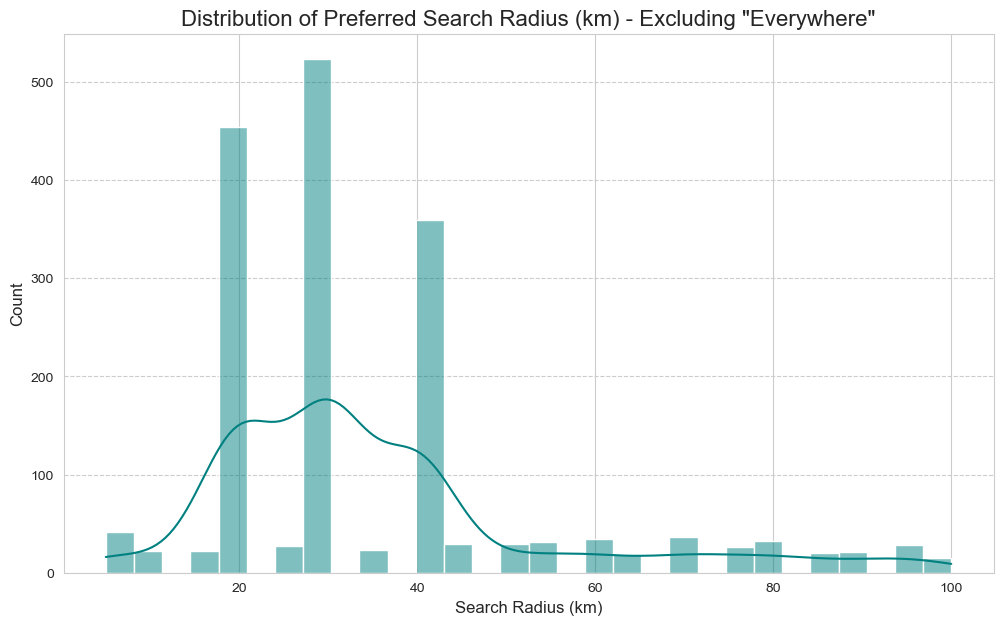

Number of users who selected 'Everywhere' for location_preference: 210 (10.49%)


In [15]:
plt.figure()

# Filter out entries where 'location_preference' is -1,
# which represents users who selected "Everywhere" (no distance preference)
loc_pref_filtered = profiles_df[profiles_df['location_preference'] != -1]['location_preference']

# Plot the distribution of preferred search radius in kilometers
# - kde=True adds a smooth Kernel Density Estimate curve for better visualization of distribution shape
# - bins=30 divides the data into 30 intervals for the histogram
# - color='teal' sets the bar and KDE line color
sns.histplot(loc_pref_filtered, kde=True, bins=30, color='teal')

# Set the title of the plot with font size for emphasis
plt.title('Distribution of Preferred Search Radius (km) - Excluding "Everywhere"', fontsize=16)

# Label the x-axis as the search radius in kilometers
plt.xlabel('Search Radius (km)', fontsize=12)

# Label the y-axis as the count of users in each bin
plt.ylabel('Count', fontsize=12)

# Add dashed grid lines on the y-axis for easier interpretation of counts
plt.grid(axis='y', linestyle='--')

# Display the histogram plot
plt.show()

# Calculate how many users selected the special "-1" value indicating "Everywhere"
everywhere_count = profiles_df[profiles_df['location_preference'] == -1].shape[0]

# Calculate the total number of user profiles
total_users = len(profiles_df)

# Print the count and percentage of users who chose "Everywhere"
print(f"Number of users who selected 'Everywhere' for location_preference: {everywhere_count} "
      f"({everywhere_count / total_users * 100:.2f}%)")

In [16]:
def plot_top_n_multivalue(df, column_name, separator, top_n, title, palette):
    """
    Plot the top N most common items in a dataframe column containing multiple values per cell,
    where items are separated by a specified delimiter.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - column_name (str): Name of the column with multi-valued entries.
    - separator (str): Delimiter used to separate multiple values in the column.
    - top_n (int): Number of top items to display in the plot.
    - title (str): Title of the plot.
    - palette (str): Color palette for the barplot.

    The function:
    - Splits the multi-valued strings into individual items.
    - Normalizes them by stripping whitespace and converting to lowercase.
    - Counts the frequency of each unique item.
    - Plots the top N items in a horizontal bar chart.
    - Handles the case where there is no data gracefully.
    """

    all_items = []  # List to hold all individual items across rows

    # Extract and normalize items from each non-null row
    df[column_name].dropna().apply(
        lambda x: all_items.extend([item.strip().lower() for item in x.split(separator)])
    )

    # Count the frequency of each item using Counter
    item_counts = Counter(all_items)

    # Get the top N most common items as a list of (item, count) tuples
    common_items = item_counts.most_common(top_n)

    # If no items found, print a message and exit the function
    if not common_items:
        print(f"No data available to plot for column '{column_name}'.")
        return

    # Create a DataFrame from the most common items for plotting
    df_common_items = pd.DataFrame(common_items, columns=[column_name.capitalize(), 'Count'])

    plt.figure(figsize=(10, 8))

    # Plot horizontal barplot using seaborn
    sns.barplot(
        data=df_common_items,
        x='Count',
        y=column_name.capitalize(),
        palette=palette,
        orient='h',
        hue=column_name.capitalize(),
        legend=False  # Disable legend since labels are self-explanatory
    )

    # Set the title and axis labels with appropriate font sizes
    plt.title(title, fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(column_name.capitalize(), fontsize=12)

    plt.tight_layout()  # Adjust layout to prevent clipping

    plt.show()

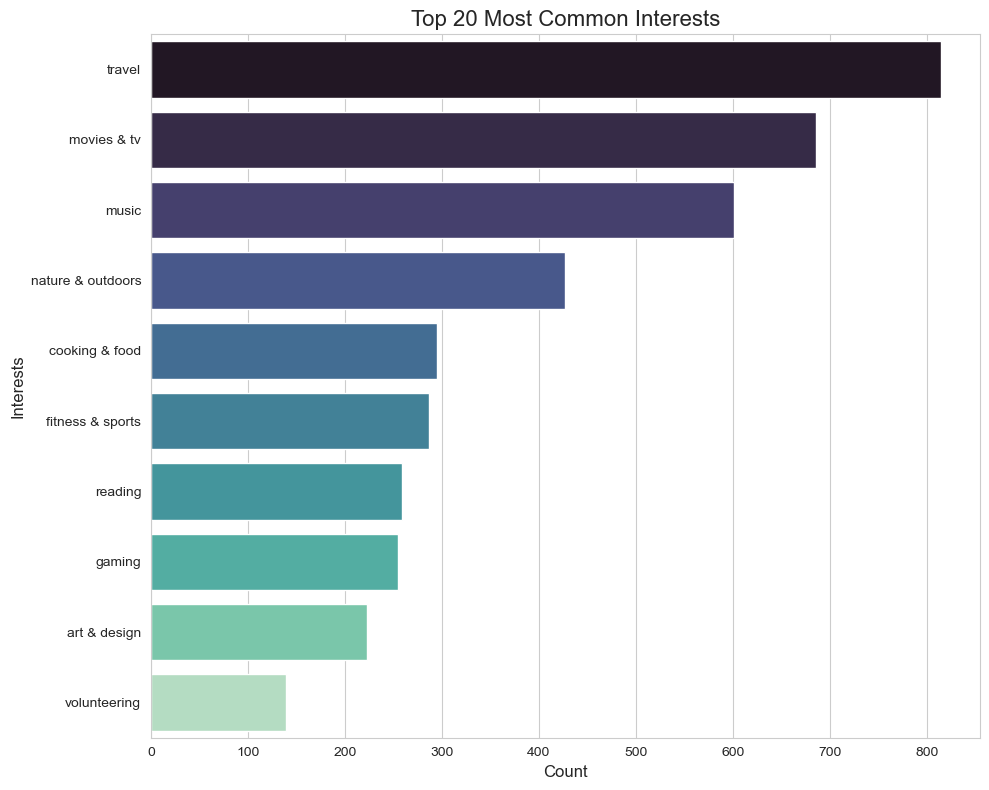

In [17]:
# Usage of the function for different multi-valued columns:
plot_top_n_multivalue(
    profiles_df,
    'interests',
    '-',
    20,
    'Top 20 Most Common Interests',
    'mako'
)

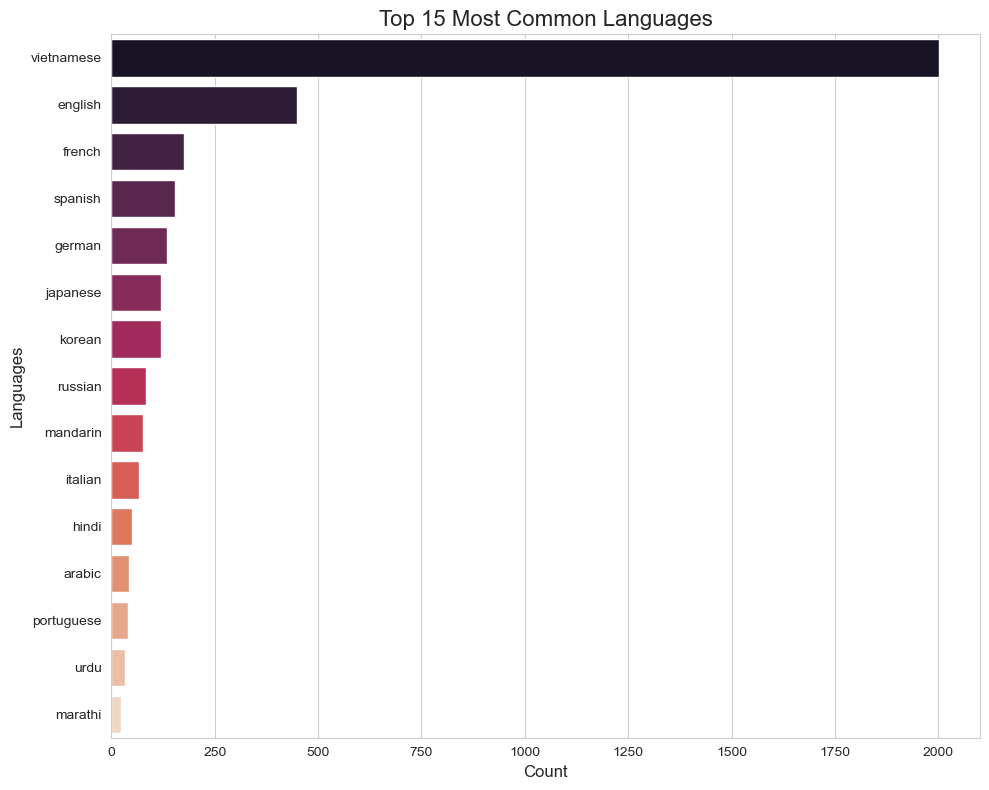

In [18]:
plot_top_n_multivalue(
    profiles_df,
    'languages',
    '-',
    15,
    'Top 15 Most Common Languages',
    'rocket'
)

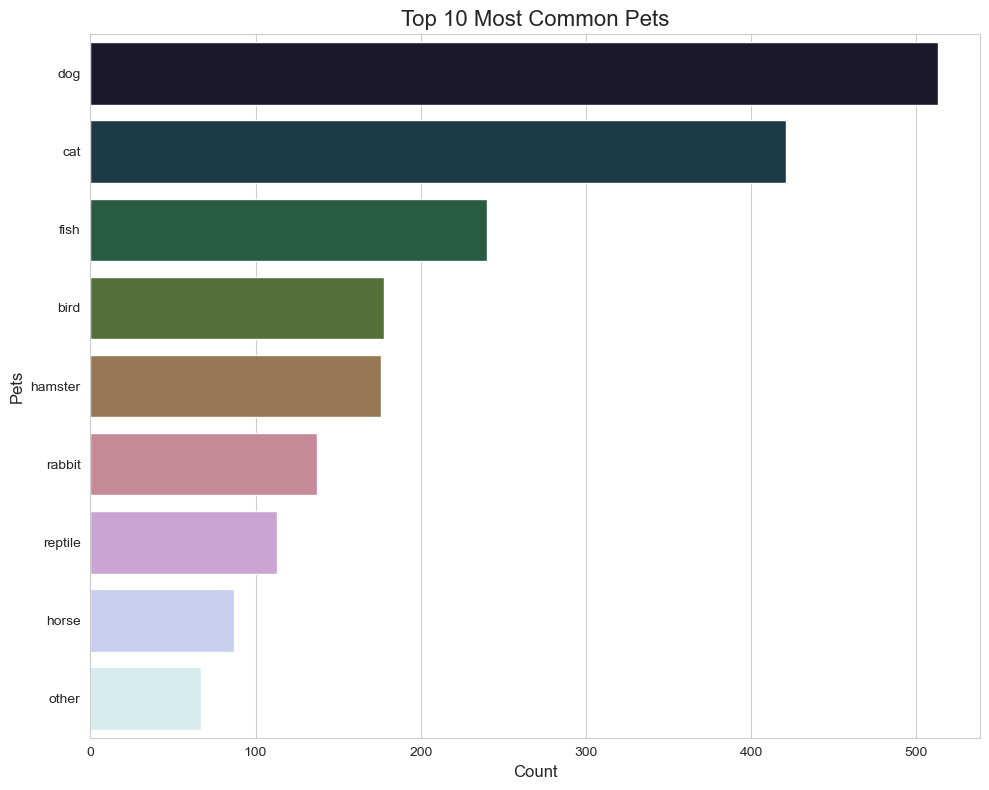

In [19]:
plot_top_n_multivalue(
    profiles_df,
    'pets',
    '-',
    10,
    'Top 10 Most Common Pets',
    'cubehelix'
)

In [20]:
# --- Part 3: Exploratory Data Analysis (EDA) for matches_df ---
print("\n--- 1.3 Exploratory Data Analysis (EDA) for matches_df ---")

# Display general information about the matches_df DataFrame:
# - Number of entries (rows)
# - Number of columns
# - Data types of each column
# - Non-null counts per column (helps identify missing data)
print("\n--- General Information about matches_df ---")
matches_df.info()


--- 1.3 Exploratory Data Analysis (EDA) for matches_df ---

--- General Information about matches_df ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16586 entries, 0 to 16585
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id_1      16586 non-null  int64  
 1   user_id_2      16586 non-null  int64  
 2   match_percent  16586 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 388.9 KB


In [21]:
# Display the first 5 rows of the matches_df DataFrame to get a quick look at the data structure and sample content
print("\n--- First 5 Rows of matches_df ---")
print(matches_df.head())


--- First 5 Rows of matches_df ---
   user_id_1  user_id_2  match_percent
0         69       1860      46.451159
1       1251       1860      52.599438
2         97       1860      50.887971
3        509       1860      50.037166
4       1280       1860      48.700275


In [22]:
# Print the total number of unique matched pairs based on the current data in matches_df
print(f"\nNumber of unique matched pairs (based on input data): {len(matches_df)}")


Number of unique matched pairs (based on input data): 16586


In [23]:
# Count the number of unique users appearing in the 'user_id_1' column
unique_users_in_matches_col1 = matches_df['user_id_1'].nunique()

# Count the number of unique users appearing in the 'user_id_2' column
unique_users_in_matches_col2 = matches_df['user_id_2'].nunique()

# Combine both user columns and find the total unique users involved in any match
all_involved_users = pd.concat([matches_df['user_id_1'], matches_df['user_id_2']]).unique()

# Print the counts with clear descriptions
print(f"Number of unique users in 'user_id_1': {unique_users_in_matches_col1}")
print(f"Number of unique users in 'user_id_2': {unique_users_in_matches_col2}")
print(f"Total number of unique users involved in matches: {len(all_involved_users)}")

Number of unique users in 'user_id_1': 1811
Number of unique users in 'user_id_2': 1823
Total number of unique users involved in matches: 1962


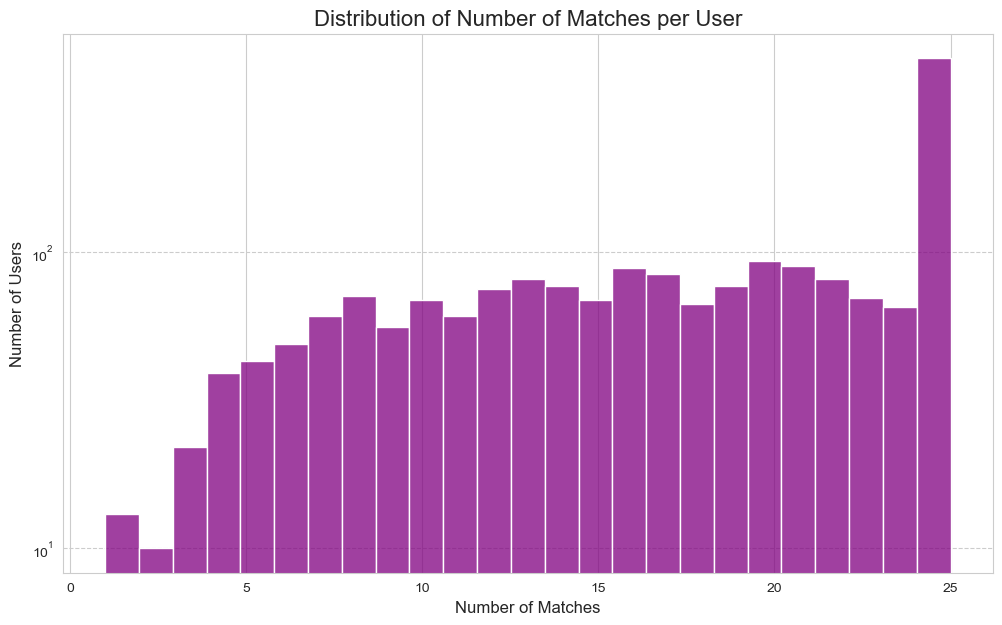


--- Statistical Summary of Matches per User ---
count    1962.000000
mean       16.907238
std         6.889198
min         1.000000
25%        11.000000
50%        18.000000
75%        24.000000
max        25.000000
Name: match_count, dtype: float64


In [24]:
# Count how many matches each user has been involved in,
# by combining user IDs from both 'user_id_1' and 'user_id_2' columns into a single list
user_match_counts = Counter(matches_df['user_id_1'].tolist() + matches_df['user_id_2'].tolist())

# Convert the counts dictionary into a DataFrame for easier analysis and visualization
# Columns: 'user_id' - the user identifier, 'match_count' - number of matches the user appeared in
match_counts_df = pd.DataFrame(user_match_counts.items(), columns=['user_id', 'match_count'])

# Plot histogram showing the distribution of the number of matches per user
plt.figure()

# Dynamically set the number of bins to the max match count (minimum 1 to avoid error)
sns.histplot(
    match_counts_df['match_count'],
    bins=max(1, match_counts_df['match_count'].max()),
    kde=False,
    color='purple'
)

# Set plot title and axis labels with readable font sizes
plt.title('Distribution of Number of Matches per User', fontsize=16)
plt.xlabel('Number of Matches', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Use logarithmic scale for y-axis to better visualize skewed data with large range
plt.yscale('log')

# Add horizontal grid lines with dashed style for better readability
plt.grid(axis='y', linestyle='--')

plt.show()

# Print descriptive statistics of match counts per user to summarize central tendency and spread
print("\n--- Statistical Summary of Matches per User ---")
print(match_counts_df['match_count'].describe())

In [25]:
# --- Part 4: Creating Training Dataset (Positive & Negative Samples) ---
print("\n--- 1.4 Creating Training Dataset ---")

# Create positive samples from existing matched pairs in matches_df
# Rename columns for clarity: 'user_id_1' -> 'user1', 'user_id_2' -> 'user2'
positive_samples = matches_df.copy()
positive_samples.rename(columns={'user_id_1': 'user1', 'user_id_2': 'user2'}, inplace=True)

# Add a target column with value 1 to indicate these are positive matches
positive_samples['target'] = 1

# Print the number of positive samples created
print(f"Number of positive samples: {len(positive_samples)}")


--- 1.4 Creating Training Dataset ---
Number of positive samples: 16586


In [26]:
# Negative samples creation (target=0)
print("\n--- Creating negative samples... ---")

# Convert user profile IDs to a set for fast membership checking
all_profile_ids = set(profiles_df['id'].unique())

# Create a set of already matched pairs to avoid duplicates and reversed duplicates
# Sorting tuple ensures (A, B) and (B, A) treated as the same pair
existing_matches_set = set()
for _, row in positive_samples.iterrows():
    existing_matches_set.add(tuple(sorted((row['user1'], row['user2']))))

# Extract user info dictionary for quick lookups: {user_id: {'sex': ..., 'orientation': ...}}
user_info_dict = profiles_df.set_index('id')[['sex', 'orientation']].to_dict('index')

negative_samples_list = []
target_negative_count = len(positive_samples) * 2  # Generate twice as many negative samples as positive ones
# (You can adjust the ratio here, e.g., 1:1, 1:3, or 1:5)

user_ids_array = profiles_df['id'].values  # Array of user IDs for random sampling
generated_negative_pairs = set()  # Track generated negative pairs to avoid duplicates

max_tries_per_sample = 1000  # Maximum attempts per negative sample to find a valid pair
total_attempts_limit = target_negative_count * max_tries_per_sample * 2  # Global attempt limit to avoid infinite loops

current_attempts = 0
while len(negative_samples_list) < target_negative_count and current_attempts < total_attempts_limit:
    current_attempts += 1

    # Randomly select two user IDs from profiles
    u1_id = np.random.choice(user_ids_array)
    u2_id = np.random.choice(user_ids_array)

    # Skip if both IDs are the same user
    if u1_id == u2_id:
        continue

    # Sort pair to maintain consistent ordering
    pair = tuple(sorted((u1_id, u2_id)))

    # Skip if pair already exists as a positive match or previously generated negative sample
    if pair in existing_matches_set or pair in generated_negative_pairs:
        continue

    # Retrieve user details to filter pairs meaningfully based on sex and orientation
    u1_details = user_info_dict.get(u1_id)
    u2_details = user_info_dict.get(u2_id)

    # Skip if either user is missing profile information
    if not u1_details or not u2_details:
        continue

    u1_sex, u1_orientation = u1_details['sex'], u1_details['orientation']
    u2_sex, u2_orientation = u2_details['sex'], u2_details['orientation']

    # Initialize flag to mark if the pair is a plausible negative sample
    plausible_negative = True

    # Determine if user1 would be interested in user2 based on orientation and sex
    user1_interested_in_user2 = False
    if u1_orientation == 'straight':
        if (u1_sex == 'male' and u2_sex == 'female') or (u1_sex == 'female' and u2_sex == 'male'):
            user1_interested_in_user2 = True
        elif u1_sex == 'non-binary' and u2_sex != 'non-binary':  # Simplified assumption for non-binary straight users
            user1_interested_in_user2 = True
    elif u1_orientation == 'homosexual':
        if u1_sex == u2_sex:  # Includes male-male, female-female, non-binary-non-binary
            user1_interested_in_user2 = True
    elif u1_orientation == 'bisexual':
        user1_interested_in_user2 = True  # Bisexual assumed interested in all sexes

    # Similarly, check if user2 would be interested in user1
    user2_interested_in_user1 = False
    if u2_orientation == 'straight':
        if (u2_sex == 'male' and u1_sex == 'female') or (u2_sex == 'female' and u1_sex == 'male'):
            user2_interested_in_user1 = True
        elif u2_sex == 'non-binary' and u1_sex != 'non-binary':
            user2_interested_in_user1 = True
    elif u2_orientation == 'homosexual':
        if u2_sex == u1_sex:
            user2_interested_in_user1 = True
    elif u2_orientation == 'bisexual':
        user2_interested_in_user1 = True

    # Handle cases where 'prefer not to say' is present for sex or orientation
    if (u1_sex == 'prefer not to say' or u2_sex == 'prefer not to say' or
        u1_orientation == 'prefer not to say' or u2_orientation == 'prefer not to say'):
        # Simplified rule: only compatible if both are bisexual or both prefer not to say
        if (u1_orientation in ['bisexual', 'prefer not to say']) and \
           (u2_orientation in ['bisexual', 'prefer not to say']):
            plausible_negative = True  # Let other similarity features decide
        else:
            plausible_negative = False
    # If both users are interested in each other based on orientation/sex logic, plausible_negative is True
    elif user1_interested_in_user2 and user2_interested_in_user1:
        plausible_negative = True
    else:
        plausible_negative = False

    # Additional logic could be added here for more nuanced cases (e.g., bisexual and non-binary)

    # Skip pairs that are not plausible negative samples based on above rules
    if not plausible_negative:
        continue

    # Append valid negative sample to list with target=0
    negative_samples_list.append({'user1': u1_id, 'user2': u2_id, 'target': 0})
    generated_negative_pairs.add(pair)

    # Print progress every 1000 generated negative samples
    if len(negative_samples_list) % 1000 == 0 and len(negative_samples_list) > 0:
        print(f"Generated {len(negative_samples_list)}/{target_negative_count} negative samples...")

# Warn if fewer negative samples generated than targeted
if len(negative_samples_list) < target_negative_count:
    print(f"Warning: Only generated {len(negative_samples_list)} negative samples, less than target {target_negative_count}.")

# Convert negative samples list to DataFrame for further use
negative_samples_df = pd.DataFrame(negative_samples_list)
print(f"Number of negative samples generated: {len(negative_samples_df)}")


--- Creating negative samples... ---
Generated 1000/33172 negative samples...
Generated 2000/33172 negative samples...
Generated 3000/33172 negative samples...
Generated 4000/33172 negative samples...
Generated 5000/33172 negative samples...
Generated 6000/33172 negative samples...
Generated 7000/33172 negative samples...
Generated 8000/33172 negative samples...
Generated 9000/33172 negative samples...
Generated 10000/33172 negative samples...
Generated 11000/33172 negative samples...
Generated 12000/33172 negative samples...
Generated 13000/33172 negative samples...
Generated 14000/33172 negative samples...
Generated 15000/33172 negative samples...
Generated 16000/33172 negative samples...
Generated 17000/33172 negative samples...
Generated 18000/33172 negative samples...
Generated 19000/33172 negative samples...
Generated 20000/33172 negative samples...
Generated 21000/33172 negative samples...
Generated 22000/33172 negative samples...
Generated 23000/33172 negative samples...
Gener

In [27]:
# Combine positive and negative samples into a single training dataset

# Ensure columns in positive_samples are consistently named ('user1' and 'user2')
# errors='ignore' prevents errors if columns already renamed
positive_samples.rename(columns={'user_id_1': 'user1', 'user_id_2': 'user2'}, inplace=True, errors='ignore')

# Concatenate positive and negative samples, selecting only relevant columns
training_data_df = pd.concat([
    positive_samples[['user1', 'user2', 'target']],
    negative_samples_df[['user1', 'user2', 'target']]
], ignore_index=True)

# Shuffle the combined dataset to randomize sample order
# random_state fixed for reproducibility
training_data_df = training_data_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Total training samples (positive + negative): {len(training_data_df)}")
print(training_data_df['target'].value_counts())

Total training samples (positive + negative): 49758
target
0    33172
1    16586
Name: count, dtype: int64


In [28]:
print("\n--- First 5 rows of the shuffled training dataset ---")
print(training_data_df.head())

print(f"\nTotal number of samples in the training dataset: {len(training_data_df)}")

print("\nTarget distribution in the training dataset (proportions):")
target_distribution = training_data_df['target'].value_counts(normalize=True)
print(target_distribution)


--- First 5 rows of the shuffled training dataset ---
   user1  user2  target
0    259    961       0
1    260    939       1
2    927     62       0
3    415   1353       0
4    293   1667       1

Total number of samples in the training dataset: 49758

Target distribution in the training dataset (proportions):
target
0    0.666667
1    0.333333
Name: proportion, dtype: float64


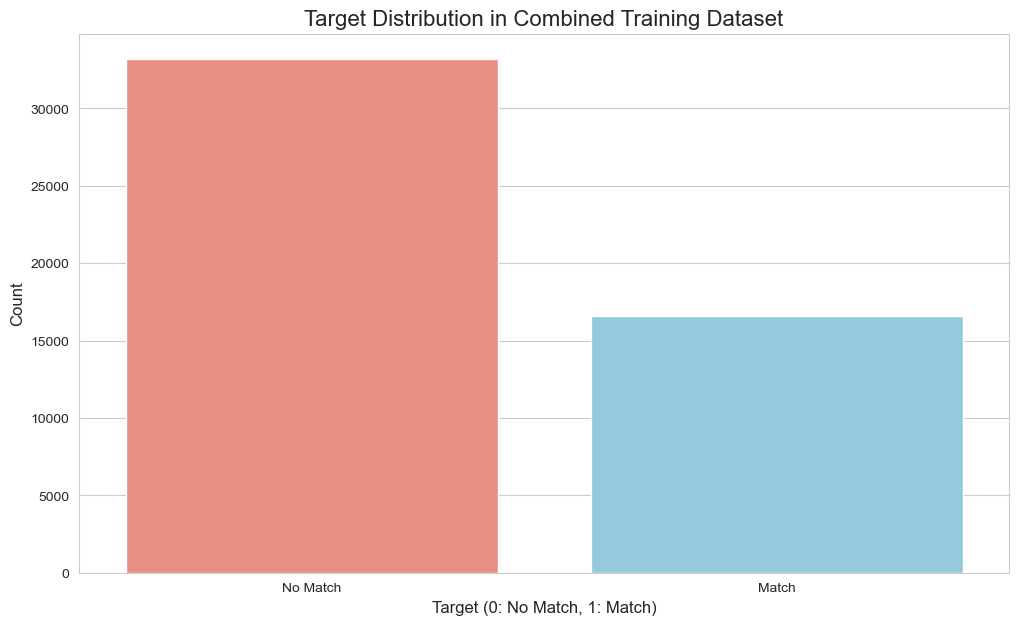

In [29]:
# Plot the distribution of the target variable in the combined training dataset
plt.figure()

# Use 'hue' argument with the same column as 'x' to avoid FutureWarning about palette usage
sns.countplot(data=training_data_df, x='target', hue='target', palette=['salmon', 'skyblue'], legend=False)

plt.title('Target Distribution in Combined Training Dataset', fontsize=16)
plt.xlabel('Target (0: No Match, 1: Match)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Match', 'Match'])
plt.show()

In [30]:
try:
    # Save the processed profiles dataframe to CSV without index
    profiles_df.to_csv("../data/profiles_processed_phase1.csv", index=False)
    # Save the training dataset (positive + negative samples) to CSV without index
    training_data_df.to_csv("../data/training_pairs_phase1.csv", index=False)
    print("\nSuccessfully saved profiles_processed_phase1.csv and training_pairs_phase1.csv")
except Exception as e:
    # Catch and print any error occurred during file saving
    print(f"Error while saving files: {e}")


Successfully saved profiles_processed_phase1.csv and training_pairs_phase1.csv


In [31]:
print("\n--- Phase 1 Completed ---")
print("Next step: Phase 2 - Feature Engineering")
print("The training dataset (training_data_df) is ready for user pair feature creation.")
print("The user profiles data (profiles_df) has been explored and now includes the 'age' column.")



--- Phase 1 Completed ---
Next step: Phase 2 - Feature Engineering
The training dataset (training_data_df) is ready for user pair feature creation.
The user profiles data (profiles_df) has been explored and now includes the 'age' column.
